In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

## **Data Collection** 

In [205]:
df = pd.read_csv('/kaggle/input/car-price-prediction/car_price_prediction_.csv')

## **Data Representation**

In [206]:
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


## **Data Wrangling**

### **Drop Unneeded Columns**

In [208]:
df.drop(columns=['Car ID'], inplace=True)

In [209]:
df.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


### **Hanlde Missing Values**

In [210]:
df.isna().sum()

Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

### **Drop Duplicated Values**

In [211]:
df.duplicated().sum()

0

## ****Dara Analysis****

In [212]:
df.sample(8)

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
1160,Audi,2013,3.3,Electric,Automatic,184885,Used,41249.71,Q7
2289,BMW,2023,5.9,Diesel,Manual,6611,Like New,63555.14,3 Series
348,Toyota,2000,2.6,Petrol,Automatic,269013,Like New,35653.47,Corolla
2250,BMW,2012,1.7,Diesel,Manual,64442,Like New,68440.51,5 Series
2487,Audi,2021,4.6,Electric,Automatic,9466,Used,15126.76,A3
1677,BMW,2023,1.3,Hybrid,Manual,93542,Like New,39098.80,5 Series
369,BMW,2001,4.0,Petrol,Manual,216085,Like New,82477.46,X5
1856,Mercedes,2004,1.2,Hybrid,Manual,4889,New,40694.09,C-Class


### **Univariate**

**Brand**

In [213]:
df['Brand'].value_counts()

Brand
Toyota      374
Audi        368
BMW         358
Mercedes    353
Honda       352
Tesla       348
Ford        347
Name: count, dtype: int64

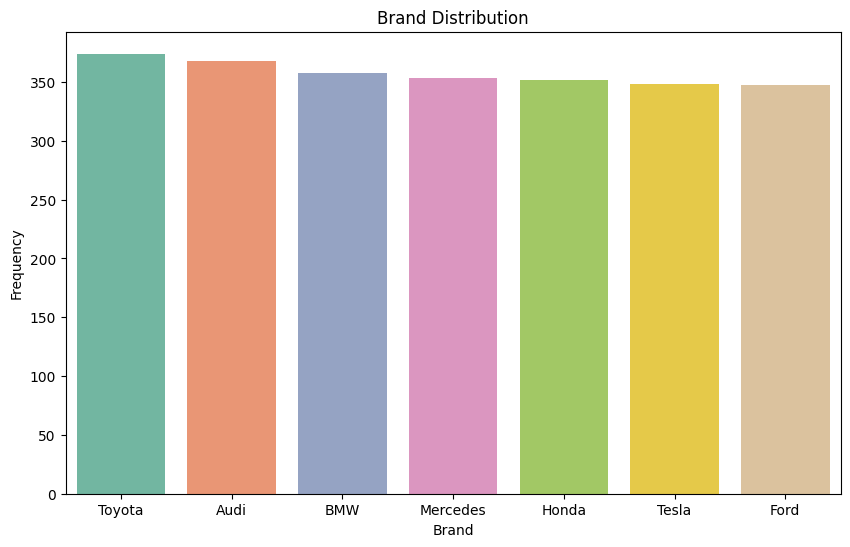

In [214]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x=df['Brand'].value_counts().index, y=df['Brand'].value_counts().values, color='green', palette=sns.color_palette("Set2"))
plt.title('Brand Distribution')
plt.xlabel('Brand')
plt.ylabel('Frequency')

plt.show()

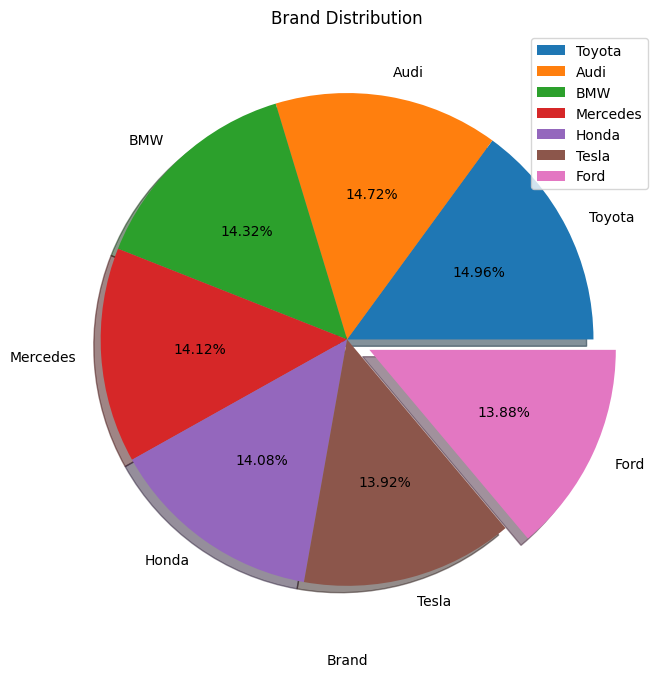

In [215]:
plt.figure(figsize=(10, 8))
plt.pie(df['Brand'].value_counts(), explode=[0,0,0,0,0,0,0.1], labels=df['Brand'].value_counts().index, shadow=True, autopct="%1.2f%%")
plt.title('Brand Distribution')
plt.xlabel('Brand')
plt.legend()

plt.show()

### **Transmission**

In [216]:
df['Transmission'].value_counts(normalize=True)*100

Transmission
Manual       52.32
Automatic    47.68
Name: proportion, dtype: float64

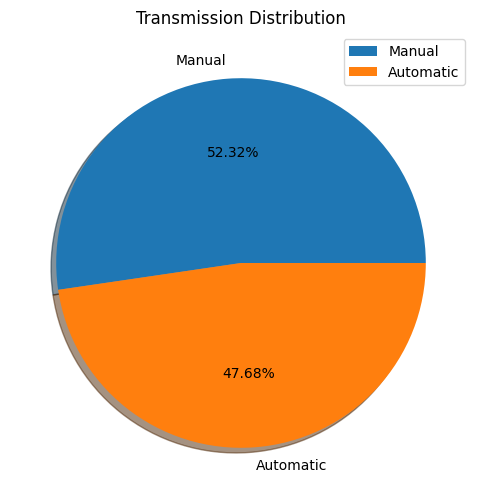

In [217]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.pie(df['Transmission'].value_counts().values,
        labels=df['Transmission'].value_counts().index,
        shadow=True,
        autopct="%1.2f%%")
plt.title('Transmission Distribution')
plt.legend()
plt.show()


### **Condition**

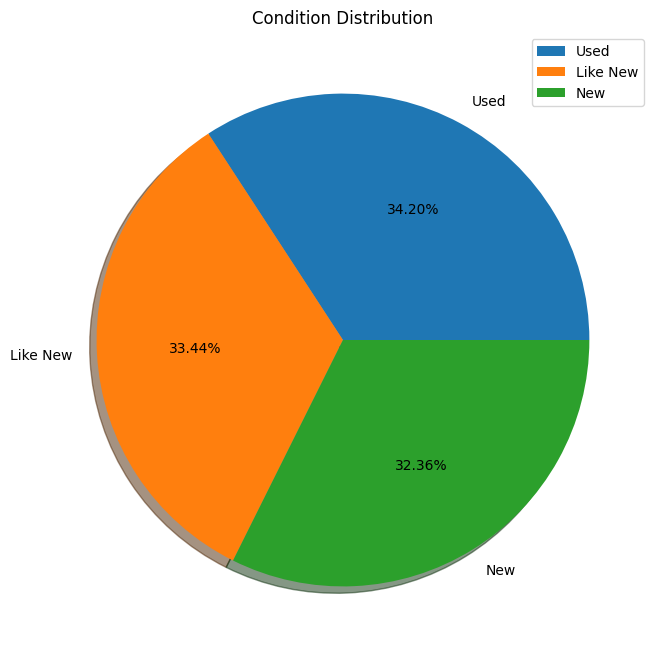

In [218]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.pie(df['Condition'].value_counts().values,
        labels=df['Condition'].value_counts().index,
        shadow=True,
        autopct="%1.2f%%")
plt.title('Condition Distribution')
plt.legend()
plt.show()



### **Price**

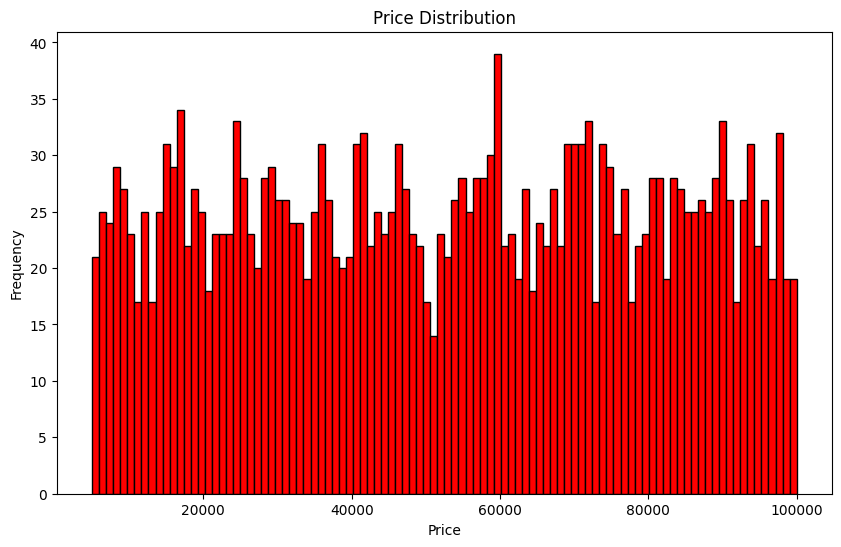

In [219]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=100, color='red', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [220]:
df.Price.describe()

count     2500.000000
mean     52638.022532
std      27295.833455
min       5011.270000
25%      28908.485000
50%      53485.240000
75%      75838.532500
max      99982.590000
Name: Price, dtype: float64

In [221]:
df[df['Price'] == 5011.270000]['Year'].value_counts()

Year
2019    1
Name: count, dtype: int64

In [222]:
df[df['Price'] == 99982.590000]['Year'].value_counts()

Year
2022    1
Name: count, dtype: int64

### **Fuel Type**

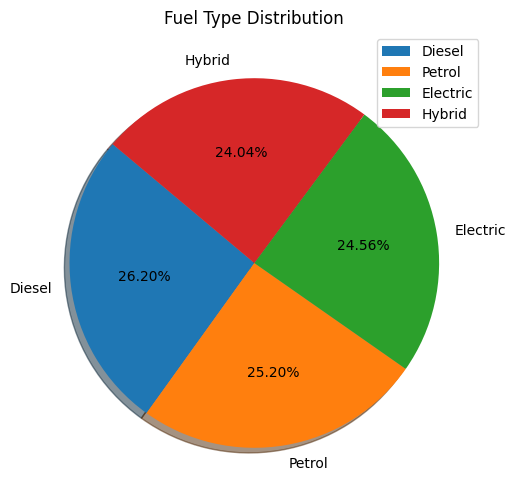

In [223]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.pie(df['Fuel Type'].value_counts().values,
        labels=df['Fuel Type'].value_counts().index,
        shadow=True,
        autopct="%1.2f%%",
        startangle=140)

plt.title('Fuel Type Distribution')
plt.legend()
plt.show()



### **Mileage**

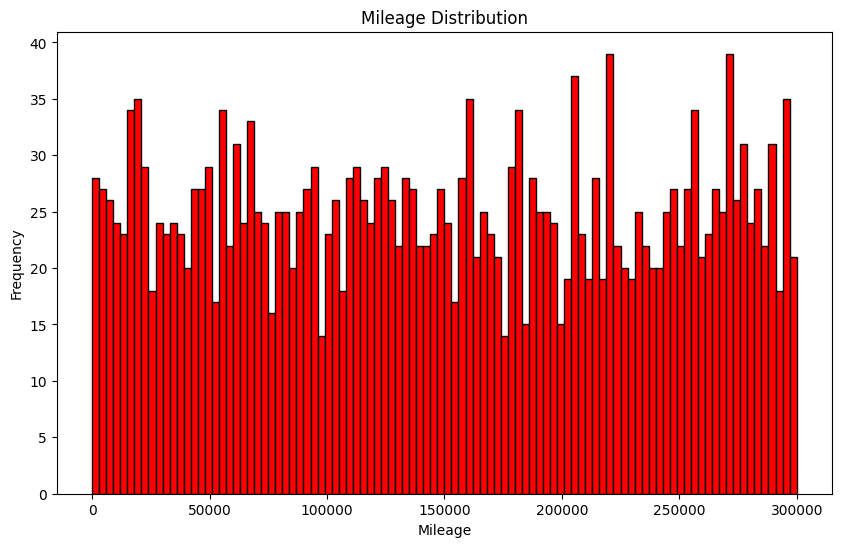

In [224]:
plt.figure(figsize=(10, 6))
plt.hist(df['Mileage'], bins=100, color='red', edgecolor='black')
plt.title('Mileage Distribution')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

### **Engine Size**

In [225]:
df['Engine Size'].value_counts()

Engine Size
1.3    69
3.9    65
3.0    61
1.8    60
2.7    60
5.1    57
4.0    57
2.2    56
3.1    56
4.8    56
4.5    56
4.4    56
1.4    54
2.1    54
5.7    53
5.0    53
2.6    53
3.4    52
2.9    52
5.8    52
3.7    51
2.0    51
5.4    51
2.4    51
3.2    50
3.8    50
4.7    50
1.9    49
5.2    49
4.2    49
2.5    48
1.7    48
1.2    48
2.8    46
2.3    46
3.3    45
4.1    45
5.5    44
4.3    44
5.3    44
1.6    43
1.5    43
5.9    42
1.1    42
3.5    41
3.6    40
5.6    39
4.6    38
4.9    33
6.0    25
1.0    23
Name: count, dtype: int64

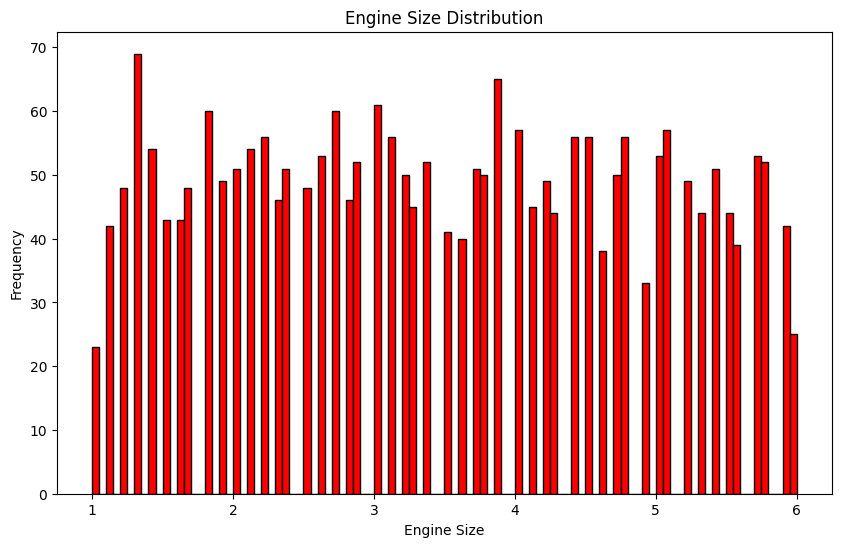

In [226]:
plt.figure(figsize=(10, 6))
plt.hist(df['Engine Size'], bins=100, color='red', edgecolor='black')
plt.title('Engine Size Distribution')
plt.xlabel('Engine Size')
plt.ylabel('Frequency')
plt.show()

### **Model**

In [227]:
df['Model'].value_counts()

Model
Fiesta      103
Corolla     103
A3           98
A4           96
CR-V         95
Q7           95
5 Series     93
Model X      93
Prius        93
3 Series     93
X3           92
GLA          92
C-Class      92
Camry        90
E-Class      89
Model Y      89
Fit          89
RAV4         88
Accord       88
Model 3      87
Explorer     86
Focus        81
GLC          80
Civic        80
X5           80
Model S      79
Q5           79
Mustang      77
Name: count, dtype: int64

<Axes: xlabel='Model'>

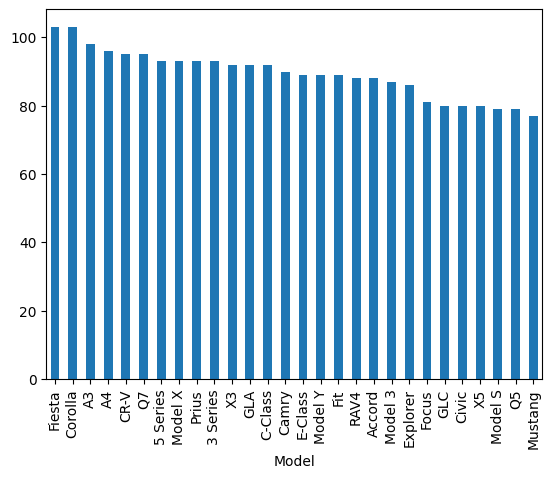

In [228]:
df['Model'].value_counts().plot(kind='bar')

**Year**

In [229]:
df['Year'].value_counts()

Year
2020    122
2016    118
2003    118
2022    112
2021    112
2012    111
2007    110
2002    110
2001    109
2008    109
2014    109
2018    106
2023    103
2005    103
2019    103
2011    101
2004    100
2017     97
2010     95
2013     95
2000     93
2009     90
2015     88
2006     86
Name: count, dtype: int64

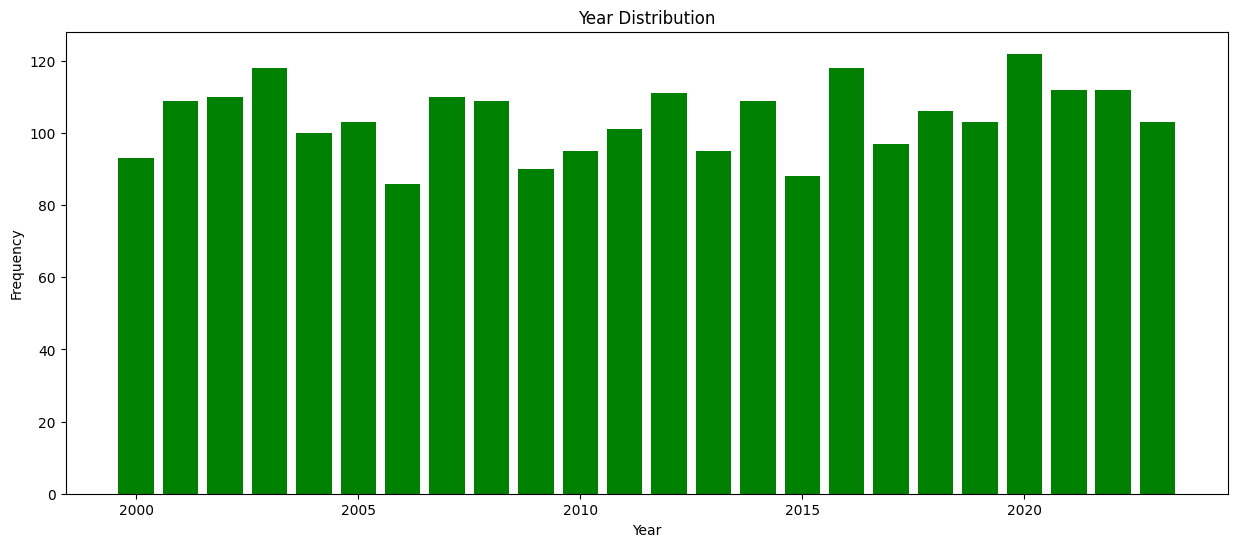

In [230]:
plt.figure(figsize=(15, 6))
plt.bar(df['Year'].value_counts().index, df['Year'].value_counts().values, color='green')
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.show()

In [231]:
df[df['Year'] == 2020]['Brand'].value_counts()

Brand
Ford        21
BMW         20
Honda       20
Mercedes    18
Tesla       17
Audi        15
Toyota      11
Name: count, dtype: int64

In [232]:

df[df['Year'] == 2015]['Brand'].value_counts()

Brand
Honda       16
Tesla       16
BMW         14
Toyota      12
Ford        11
Audi        10
Mercedes     9
Name: count, dtype: int64

In [233]:
df['Year'].value_counts()

Year
2020    122
2016    118
2003    118
2022    112
2021    112
2012    111
2007    110
2002    110
2001    109
2008    109
2014    109
2018    106
2023    103
2005    103
2019    103
2011    101
2004    100
2017     97
2010     95
2013     95
2000     93
2009     90
2015     88
2006     86
Name: count, dtype: int64

### **Bivariate**

In [234]:
df.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


### **brand vs prise**

In [235]:
bi1 =df.groupby(['Brand'])['Price'].sum().sort_values(ascending=False)
bi1

Brand
Toyota      19477444.36
BMW         19388246.95
Audi        19118860.33
Mercedes    18776454.80
Tesla       18609490.52
Honda       18321699.95
Ford        17902859.42
Name: Price, dtype: float64

In [236]:
pd.DataFrame(bi1)

,Price
Brand,
Toyota,19477444.36
BMW,19388246.95
Audi,19118860.33
Mercedes,18776454.80
Tesla,18609490.52
Honda,18321699.95
Ford,17902859.42


In [237]:
bi11 =df.groupby(['Brand'])['Price'].mean().sort_values(ascending=False)
bi11

Brand
BMW         54157.114385
Tesla       53475.547471
Mercedes    53191.090085
Toyota      52078.728235
Honda       52050.283949
Audi        51953.424810
Ford        51593.254813
Name: Price, dtype: float64

In [238]:
pd.DataFrame(bi11)

,Price
Brand,
BMW,54157.114385
Tesla,53475.547471
Mercedes,53191.090085
Toyota,52078.728235
Honda,52050.283949
Audi,51953.424810
Ford,51593.254813


In [239]:
bi2 = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)
bi2 

Brand
BMW         54157.114385
Tesla       53475.547471
Mercedes    53191.090085
Toyota      52078.728235
Honda       52050.283949
Audi        51953.424810
Ford        51593.254813
Name: Price, dtype: float64

In [240]:
pd.DataFrame(bi2)

,Price
Brand,
BMW,54157.114385
Tesla,53475.547471
Mercedes,53191.090085
Toyota,52078.728235
Honda,52050.283949
Audi,51953.424810
Ford,51593.254813


### **year vs prise**

In [241]:
bi3= df.groupby(['Year'])['Price'].sum().sort_values(ascending=False)
bi3 

Year
2012    6337227.36
2002    6291722.36
2007    6211062.39
2003    6166702.11
2016    6133340.76
2022    6121487.63
2005    5926035.33
2014    5908080.92
2020    5890372.21
2008    5788421.97
2018    5579940.34
2021    5467808.09
2001    5334902.29
2023    5286855.35
2011    5192901.99
2004    5151797.69
2019    5134378.92
2010    5096773.24
2013    4987028.30
2000    4937757.20
2009    4763946.22
2017    4757431.85
2006    4595633.25
2015    4533448.56
Name: Price, dtype: float64

In [242]:
pd.DataFrame(bi3)

,Price
Year,
2012,6337227.36
2002,6291722.36
2007,6211062.39
2003,6166702.11
2016,6133340.76
2022,6121487.63
2005,5926035.33
2014,5908080.92
2020,5890372.21


In [243]:
years = df.groupby(['Year'])['Brand'].value_counts()
years

Year  Brand   
2000  Audi        20
      Mercedes    15
      Toyota      14
      Honda       13
      BMW         12
                  ..
2023  Honda       14
      Mercedes    14
      Tesla       14
      BMW         13
      Ford         9
Name: count, Length: 168, dtype: int64

In [244]:
type(years)

pandas.core.series.Series

In [245]:
pd.DataFrame(years)

count
Year Brand          
2000 Audi         20
     Mercedes     15
     Toyota       14
     Honda        13
     BMW          12
...              ...
2023 Honda        14
     Mercedes     14
     Tesla        14
     BMW          13
     Ford          9

[168 rows x 1 columns]

### **year vs fuel type**

In [246]:
yf = df.groupby(['Year'])['Fuel Type'].value_counts()
yf

Year  Fuel Type
2000  Diesel       25
      Electric     24
      Hybrid       24
      Petrol       20
2001  Petrol       32
                   ..
2022  Hybrid       25
2023  Hybrid       29
      Diesel       28
      Petrol       25
      Electric     21
Name: count, Length: 96, dtype: int64

In [247]:
pd.DataFrame(yf) 

count
Year Fuel Type       
2000 Diesel        25
     Electric      24
     Hybrid        24
     Petrol        20
2001 Petrol        32
...               ...
2022 Hybrid        25
2023 Hybrid        29
     Diesel        28
     Petrol        25
     Electric      21

[96 rows x 1 columns]

### **Transmission vs Fuel Type**

In [248]:
TF=df.groupby(['Transmission'])['Fuel Type'].value_counts()
TF

Transmission  Fuel Type
Automatic     Petrol       316
              Diesel       309
              Electric     291
              Hybrid       276
Manual        Diesel       346
              Hybrid       325
              Electric     323
              Petrol       314
Name: count, dtype: int64

In [249]:
pd.DataFrame(TF) 

count
Transmission Fuel Type       
Automatic    Petrol       316
             Diesel       309
             Electric     291
             Hybrid       276
Manual       Diesel       346
             Hybrid       325
             Electric     323
             Petrol       314

### **Engine Siz vs Price**

In [250]:
EP = df.groupby('Engine Size')['Price'].sum()
EP

Engine Size
1.0    1450284.83
1.1    2069894.82
1.2    2410645.77
1.3    3820144.04
1.4    2652365.11
1.5    2031022.78
1.6    2326359.03
1.7    2552660.47
1.8    3379449.47
1.9    2565542.08
2.0    2571564.70
2.1    2739632.81
2.2    3367187.21
2.3    2514232.64
2.4    3004344.02
2.5    2390936.81
2.6    2649534.52
2.7    3221913.23
2.8    2354527.49
2.9    2481539.32
3.0    3003752.33
3.1    3246816.47
3.2    2917642.51
3.3    2084238.88
3.4    2833413.94
3.5    2056101.71
3.6    2325806.41
3.7    2868605.20
3.8    2700559.39
3.9    3254061.81
4.0    2557739.01
4.1    2220712.58
4.2    2174450.90
4.3    2231798.83
4.4    3074376.71
4.5    3110103.52
4.6    1943598.89
4.7    2540351.09
4.8    2917954.63
4.9    1993602.00
5.0    3138948.33
5.1    3310367.55
5.2    2422833.40
5.3    2443322.45
5.4    2270785.29
5.5    2058320.82
5.6    1967048.22
5.7    3040928.62
5.8    2916972.05
5.9    2164193.70
6.0    1251867.94
Name: Price, dtype: float64

In [251]:
pd.DataFrame(EP) 

,Price
Engine Size,
1.0,1450284.83
1.1,2069894.82
1.2,2410645.77
1.3,3820144.04
1.4,2652365.11
1.5,2031022.78
1.6,2326359.03
1.7,2552660.47
1.8,3379449.47


### **Multivariate**

In [252]:
df.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


### **Brand vs Year vs Price**

In [253]:
mul1=df.groupby(['Brand', 'Year'])['Price'].sum().sort_values(ascending=False)
mul1

Brand     Year
Mercedes  2021    1401646.70
Tesla     2002    1273232.39
Audi      2000    1244979.31
Mercedes  2007    1197791.72
BMW       2022    1196272.42
                     ...    
Honda     2009     381921.66
Tesla     2019     338078.21
Toyota    2011     333931.92
Tesla     2000     319059.35
BMW       2017     295161.40
Name: Price, Length: 168, dtype: float64

In [254]:
pd.DataFrame(mul1)

,,Price
Brand,Year,
Mercedes,2021,1401646.70
Tesla,2002,1273232.39
Audi,2000,1244979.31
Mercedes,2007,1197791.72
BMW,2022,1196272.42
...,...,...
Honda,2009,381921.66
Tesla,2019,338078.21
Toyota,2011,333931.92


### **brand vs condition vs price**

In [255]:
mul2=df.groupby(['Brand', 'Condition'])['Price'].mean().sort_values(ascending=False)
mul2

Brand     Condition
Tesla     Used         56170.430556
          Like New     55098.004793
Toyota    Like New     54968.755413
BMW       New          54920.846538
          Like New     54000.022319
          Used         53659.274397
Ford      New          53635.520088
Mercedes  Used         53567.392188
Honda     New          53297.152477
Mercedes  Like New     53181.418727
Audi      Used         53145.078438
Ford      Like New     52967.725403
Mercedes  New          52781.500348
Honda     Like New     52429.640163
Toyota    Used         52241.689310
Audi      Like New     51931.677658
          New          50789.721473
Honda     Used         50528.871583
Tesla     New          49380.045714
Toyota    New          49256.708917
Ford      Used         47945.888182
Name: Price, dtype: float64

In [256]:
pd.DataFrame(mul2)

Price
Brand    Condition              
Tesla    Used       56170.430556
         Like New   55098.004793
Toyota   Like New   54968.755413
BMW      New        54920.846538
         Like New   54000.022319
         Used       53659.274397
Ford     New        53635.520088
Mercedes Used       53567.392188
Honda    New        53297.152477
Mercedes Like New   53181.418727
Audi     Used       53145.078438
Ford     Like New   52967.725403
Mercedes New        52781.500348
Honda    Like New   52429.640163
Toyota   Used       52241.689310
Audi     Like New   51931.677658
         New        50789.721473
Honda    Used       50528.871583
Tesla    New        49380.045714
Toyota   New        49256.708917
Ford     Used       47945.888182

### **brand vs condition vs year vs price**

In [257]:
mulx=df.groupby(['Brand', 'Condition','Year'])['Price'].mean().sort_values(ascending=False)
mulx

Brand     Condition  Year
Toyota    New        2009    97425.690000
Audi      Like New   2012    96394.410000
Honda     New        2010    95926.800000
Mercedes  New        2020    94771.690000
Toyota    Like New   2010    94478.130000
                                 ...     
Honda     New        2002    16453.630000
Toyota    New        2011    15401.696667
                     2015     7865.330000
Tesla     New        2019     7864.345000
Ford      New        2010     6690.810000
Name: Price, Length: 502, dtype: float64

In [258]:
pd.DataFrame(mulx)

Price
Brand    Condition Year              
Toyota   New       2009  97425.690000
Audi     Like New  2012  96394.410000
Honda    New       2010  95926.800000
Mercedes New       2020  94771.690000
Toyota   Like New  2010  94478.130000
...                               ...
Honda    New       2002  16453.630000
Toyota   New       2011  15401.696667
                   2015   7865.330000
Tesla    New       2019   7864.345000
Ford     New       2010   6690.810000

[502 rows x 1 columns]

### **Fuel Type vs Transmission vs Price**

In [259]:
mul3=df.groupby(['Fuel Type', 'Transmission'])['Price'].sum().sort_values(ascending=False)
mul3


Fuel Type  Transmission
Diesel     Manual          19384870.85
Hybrid     Manual          17103596.78
Diesel     Automatic       16638162.57
Petrol     Automatic       16544566.73
Electric   Manual          16228878.99
Petrol     Manual          16069221.62
Electric   Automatic       15148371.32
Hybrid     Automatic       14477387.47
Name: Price, dtype: float64

In [260]:
pd.DataFrame(mul3)

,,Price
Fuel Type,Transmission,
Diesel,Manual,19384870.85
Hybrid,Manual,17103596.78
Diesel,Automatic,16638162.57
Petrol,Automatic,16544566.73
Electric,Manual,16228878.99
Petrol,Manual,16069221.62
Electric,Automatic,15148371.32
Hybrid,Automatic,14477387.47


### **Condition vs Year vs Price**

In [261]:
mul4=df.groupby(['Condition', 'Year'])['Price'].mean().sort_values(ascending=False)
mul4

Condition  Year
Like New   2012    63516.577500
New        2005    62742.871389
Like New   2010    61673.365405
Used       2000    60174.486207
           2007    59957.061951
                       ...     
New        2020    46529.709615
           2023    46019.623810
           2011    44659.344839
Used       2001    42968.865128
New        2019    39412.628462
Name: Price, Length: 72, dtype: float64

In [262]:
pd.DataFrame(mul4)

Price
Condition Year              
Like New  2012  63516.577500
New       2005  62742.871389
Like New  2010  61673.365405
Used      2000  60174.486207
          2007  59957.061951
...                      ...
New       2020  46529.709615
          2023  46019.623810
          2011  44659.344839
Used      2001  42968.865128
New       2019  39412.628462

[72 rows x 1 columns]

### **Engine Size vs Fuel Type vs Price**

In [263]:
mil5=df.groupby(['Engine Size', 'Fuel Type'])['Price'].mean().sort_values(ascending=False)
mil5


Engine Size  Fuel Type
3.2          Hybrid       76150.074444
4.9          Petrol       75409.803000
1.0          Petrol       72788.346667
5.7          Petrol       70681.120000
3.6          Hybrid       69811.170000
                              ...     
5.9          Electric     37210.222000
1.5          Diesel       36119.950000
3.3          Hybrid       35032.933846
             Diesel       30981.521429
4.6          Hybrid       21297.431429
Name: Price, Length: 204, dtype: float64

In [264]:
pd.DataFrame(mil5)

,,Price
Engine Size,Fuel Type,
3.2,Hybrid,76150.074444
4.9,Petrol,75409.803000
1.0,Petrol,72788.346667
5.7,Petrol,70681.120000
3.6,Hybrid,69811.170000
...,...,...
5.9,Electric,37210.222000
1.5,Diesel,36119.950000
3.3,Hybrid,35032.933846


### **Brand vs Model vs Price**

In [265]:
BMP = df.groupby(['Brand', 'Model'])['Price'].mean()

In [266]:
pd.DataFrame(BMP)

Price
Brand    Model                 
Audi     A3        50530.147551
         A4        51554.915000
         Q5        53432.295949
         Q7        52594.554211
BMW      3 Series  58561.123548
         5 Series  55986.422796
         X3        51021.077391
         X5        50517.325250
Ford     Explorer  52117.953953
         Fiesta    51313.160777
         Focus     55677.760000
         Mustang   47085.211169
Honda    Accord    52799.983523
         CR-V      50046.228316
         Civic     49912.979250
         Fit       55369.341236
Mercedes C-Class   53080.840761
         E-Class   51358.704157
         GLA       49549.031304
         GLC       59544.773750
Tesla    Model 3   55142.083563
         Model S   52887.345823
         Model X   51235.880753
         Model Y   54708.899101
Toyota   Camry     56405.516111
         Corolla   53782.605534
         Prius     46789.795484
         RAV4      51248.733636

### **Brand vs Fuel Type vs Price**

In [267]:
BFP = df.groupby(['Brand', 'Fuel Type'])['Price'].mean()
BFP

Brand     Fuel Type
Audi      Diesel       56574.073814
          Electric     51376.561170
          Hybrid       50374.120000
          Petrol       49182.028125
BMW       Diesel       59334.373587
          Electric     50654.630879
          Hybrid       55599.859302
          Petrol       50992.418764
Ford      Diesel       52679.123294
          Electric     47298.914706
          Hybrid       52169.371628
          Petrol       54045.716813
Honda     Diesel       50711.301262
          Electric     50602.706667
          Hybrid       55014.680805
          Petrol       51919.030920
Mercedes  Diesel       54449.243494
          Electric     54237.306707
          Hybrid       50099.797125
          Petrol       53719.672870
Tesla     Diesel       56368.296818
          Electric     53285.740600
          Hybrid       51733.169529
          Petrol       52309.159067
Toyota    Diesel       55101.860280
          Electric     49961.358506
          Hybrid       52509.856875
        

In [268]:
pd.DataFrame(BFP)

Price
Brand    Fuel Type              
Audi     Diesel     56574.073814
         Electric   51376.561170
         Hybrid     50374.120000
         Petrol     49182.028125
BMW      Diesel     59334.373587
         Electric   50654.630879
         Hybrid     55599.859302
         Petrol     50992.418764
Ford     Diesel     52679.123294
         Electric   47298.914706
         Hybrid     52169.371628
         Petrol     54045.716813
Honda    Diesel     50711.301262
         Electric   50602.706667
         Hybrid     55014.680805
         Petrol     51919.030920
Mercedes Diesel     54449.243494
         Electric   54237.306707
         Hybrid     50099.797125
         Petrol     53719.672870
Tesla    Diesel     56368.296818
         Electric   53285.740600
         Hybrid     51733.169529
         Petrol     52309.159067
Toyota   Diesel     55101.860280
         Electric   49961.358506
         Hybrid     52509.856875
         Petrol     49928.105476

## **Data Preprocessing**

#### **Drop Unneeded Columns  (not needed)**

In [269]:
df.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


#### **Define Features X and Tanget y**

In [270]:
X = df.drop(columns=['Price'])
y = df['Price']

In [271]:
X

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,Mustang
...,...,...,...,...,...,...,...,...
2495,Audi,2020,2.4,Petrol,Automatic,22650,Like New,Q5
2496,Audi,2001,5.7,Hybrid,Manual,77701,Like New,A3
2497,Ford,2021,1.1,Hybrid,Manual,272827,Like New,Fiesta
2498,Audi,2002,4.5,Diesel,Manual,229164,Like New,Q5


In [272]:
y

0       26613.92
1       14679.61
2       44402.61
3       86374.33
4       73577.10
          ...   
2495    61384.10
2496    24710.35
2497    29902.45
2498    46085.67
2499    16594.14
Name: Price, Length: 2500, dtype: float64

#### **Data Encoding**

In [273]:
X.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,Mustang


In [274]:
encoder = LabelEncoder()

X['Brand'] = encoder.fit_transform(X['Brand'])

In [275]:
X.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
0,5,2016,2.3,Petrol,Manual,114832,New,Model X
1,1,2018,4.4,Electric,Manual,143190,Used,5 Series
2,0,2013,4.5,Electric,Manual,181601,New,A4
3,5,2011,4.1,Diesel,Automatic,68682,New,Model Y
4,2,2009,2.6,Diesel,Manual,223009,Like New,Mustang


In [276]:
X['Fuel Type'] = encoder.fit_transform(df['Fuel Type'])
X['Transmission'] = encoder.fit_transform(df['Transmission'])
X['Condition'] = encoder.fit_transform(df['Condition'])
X['Model'] = encoder.fit_transform(df['Model'])

In [277]:
X

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
0,5,2016,2.3,3,1,114832,1,19
1,1,2018,4.4,1,1,143190,2,1
2,0,2013,4.5,1,1,181601,1,3
3,5,2011,4.1,0,0,68682,1,20
4,2,2009,2.6,0,1,223009,0,21
...,...,...,...,...,...,...,...,...
2495,0,2020,2.4,3,0,22650,0,23
2496,0,2001,5.7,2,1,77701,0,2
2497,2,2021,1.1,2,1,272827,0,12
2498,0,2002,4.5,0,1,229164,0,23


#### **Data Scaling**

In [278]:
X.shape

(2500, 8)

In [279]:
X[['Mileage']].shape

(2500, 1)

In [280]:
scaler = MinMaxScaler()

X['Mileage'] = scaler.fit_transform(X[['Mileage']])

In [281]:
X

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
0,5,2016,2.3,3,1,0.382785,1,19
1,1,2018,4.4,1,1,0.477326,2,1
2,0,2013,4.5,1,1,0.605384,1,3
3,5,2011,4.1,0,0,0.228927,1,20
4,2,2009,2.6,0,1,0.743432,0,21
...,...,...,...,...,...,...,...,...
2495,0,2020,2.4,3,0,0.075462,0,23
2496,0,2001,5.7,2,1,0.258995,0,2
2497,2,2021,1.1,2,1,0.909519,0,12
2498,0,2002,4.5,0,1,0.763952,0,23


#### **Data Splitting**

In [282]:
[1, 2, 3, 4, 5, 6]
rs=42

[4, 5, 3, 1, 2, 6]

rs=3
[5, 6, 4, 3, 1, 2]



[5, 6, 4, 3, 1, 2]

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

In [284]:
X_test.shape

(500, 8)

## **Data Modeling**

In [285]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [286]:
y_pred = lr.predict(X_test)
y_pred

array([54611.31979559, 50690.18482887, 52865.70245326, 52777.94005346,
       51066.06630123, 52094.95337088, 50207.55518582, 52542.94504687,
       54407.45175053, 52758.05826254, 54046.80982246, 51577.87248685,
       53260.80318465, 54334.89342305, 50912.60199686, 50934.97579385,
       53094.76732329, 54021.30577641, 51094.18678722, 54557.69556952,
       50274.38316975, 51824.55669779, 50120.3569337 , 52008.39464522,
       50536.73359457, 50691.86177226, 54490.80236598, 51453.52821764,
       53284.29433204, 52980.59345509, 51175.58306193, 53237.54763193,
       53016.93376262, 51745.08779233, 53307.32664416, 50764.95855319,
       49952.74035602, 51126.89675723, 49984.2652508 , 54499.52574047,
       51726.00074254, 53561.25892471, 56086.89107514, 51189.99279952,
       51454.58214258, 52049.79834627, 51018.870043  , 53681.71157123,
       52684.48027259, 50944.80552891, 54788.19584022, 53546.34137798,
       50273.67492719, 54809.16480523, 55787.48361506, 49761.93754877,
      

In [287]:
y_test

1447    17494.90
1114    75919.94
1064    87474.10
2287    13522.58
1537    77070.57
          ...   
2375    18249.22
1609    94121.24
596     72013.84
84      84585.18
2213    16960.31
Name: Price, Length: 500, dtype: float64

In [288]:
print('mean_squared_error : ',mean_squared_error(y_test, y_pred))
print('mean_absolute_error:',mean_absolute_error(y_test, y_pred))

mean_squared_error :  759016533.567881
mean_absolute_error: 23692.564222638597


In [289]:
sgd = SGDRegressor()

sgd.fit(X_train, y_train)

SGDRegressor()

In [290]:
y_pred = sgd.predict(X_test)

In [291]:
print('mean_squared_error : ',mean_squared_error(y_test, y_pred))
print('mean_absolute_error:',mean_absolute_error(y_test, y_pred))

mean_squared_error :  3.716985345993776e+30
mean_absolute_error: 1927869790833716.2


In [292]:
lasso = Lasso()

lasso.fit(X_train, y_train)

Lasso()

In [293]:
y_pred = lasso.predict(X_test)

In [294]:
print('mean_squared_error : ',mean_squared_error(y_test, y_pred))
print('mean_absolute_error:',mean_absolute_error(y_test, y_pred))

mean_squared_error :  759011907.9601694
mean_absolute_error: 23692.50199088257


In [295]:
ridge = Ridge()

ridge.fit(X_train, y_train)

Ridge()

In [296]:
y_pred = ridge.predict(X_test)

In [297]:
print('mean_squared_error : ',mean_squared_error(y_test, y_pred))
print('mean_absolute_error:',mean_absolute_error(y_test, y_pred))

mean_squared_error :  759012319.218402
mean_absolute_error: 23692.51361843742
